NameError: name 'plt' is not defined

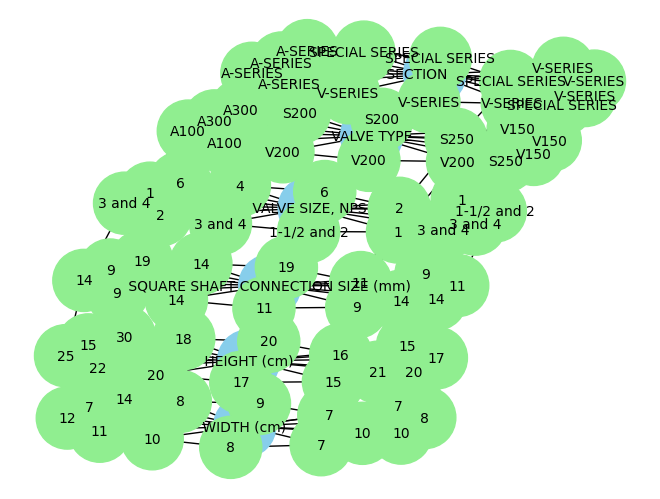

In [2]:
import networkx as nx
import re

def parse_markdown_table(markdown):
    # Split the markdown into lines
    lines = markdown.strip().split('\n')
    
    # Find the header and separator line
    header = lines[0].strip().split('|')[1:-1]
    separator = lines[1].strip().split('|')[1:-1]
    
    # Find the data rows
    rows = [line.strip().split('|')[1:-1] for line in lines[2:]]
    
    return header, rows

def create_table_graph(header, rows):
    G = nx.Graph()
    
    # Add header nodes
    for col, col_name in enumerate(header):
        G.add_node(f'header_{col}', label=col_name, type='header')
    
    # Add data nodes
    for row_idx, row in enumerate(rows):
        for col_idx, cell in enumerate(row):
            node_id = f'cell_{row_idx}_{col_idx}'
            G.add_node(node_id, label=cell.strip(), type='cell', row=row_idx, col=col_idx)
            
            # Connect to header
            G.add_edge(node_id, f'header_{col_idx}')
            
            # Connect to previous cell in the row
            if col_idx > 0:
                G.add_edge(node_id, f'cell_{row_idx}_{col_idx - 1}')
                
            # Connect to previous cell in the column
            if row_idx > 0:
                G.add_edge(node_id, f'cell_{row_idx - 1}_{col_idx}')
    
    return G

def visualize_graph(G):
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    node_colors = ['skyblue' if G.nodes[node]['type'] == 'header' else 'lightgreen' for node in G.nodes]
    nx.draw(G, pos, with_labels=True, labels=labels, node_color=node_colors, node_size=2000, font_size=10)
    plt.show()

# Example markdown table
markdown_table = """
| SECTION         | VALVE TYPE | VALVE SIZE, NPS | SQUARE SHAFT CONNECTION SIZE (mm) | HEIGHT (cm) | WIDTH (cm) |
|-----------------|------------|-----------------|----------------------------------|-------------|------------|
| V-SERIES        | V150       | 1               | 9                                | 15          | 7          |
| V-SERIES        | V150       | 1-1/2 and 2     | 11                               | 17          | 8          |
| V-SERIES        | V150       | 3 and 4         | 14                               | 20          | 10         |
| V-SERIES        | V200       | 1               | 9                                | 15          | 7          |
| V-SERIES        | V200       | 1-1/2 and 2     | 11                               | 17          | 8          |
| V-SERIES        | V200       | 3 and 4         | 14                               | 20          | 10         |
| A-SERIES        | A100       | 2               | 9                                | 22          | 11         |
| A-SERIES        | A100       | 3 and 4         | 14                               | 25          | 12         |
| A-SERIES        | A300       | 1               | 9                                | 15          | 7          |
| A-SERIES        | A300       | 6               | 19                               | 30          | 14         |
| SPECIAL SERIES  | S200       | 4               | 14                               | 18          | 8          |
| SPECIAL SERIES  | S200       | 6               | 19                               | 20          | 9          |
| SPECIAL SERIES  | S250       | 2               | 11                               | 16          | 7          |
| SPECIAL SERIES  | S250       | 3 and 4         | 14                               | 21          | 10         |
"""

# Parse the markdown table
header, rows = parse_markdown_table(markdown_table)

# Create the graph
G = create_table_graph(header, rows)

# Visualize the graph
visualize_graph(G)


In [12]:
import json
import matplotlib.pyplot as plt
import networkx as nx

# Load the JSON data from the provided file
with open('/Users/ashishmadkaikar/code/python/bulletin-generator/topic_collections/200R/topics/Tables/bauman2.json') as f:
    data = json.load(f)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for node in data['nodes']:
    G.add_node(node['id'], label=node['label'], type=node['type'])
    
for edge in data['edges']:
    G.add_edge(edge['source'], edge['target'])

# Define node colors based on their type
color_map = {
    'root': 'red',
    'port': 'blue',
    'psi': 'green',
    'travel': 'purple',
    'yoke': 'orange',
    'actuator': 'brown'
}

node_colors = [color_map[G.nodes[node]['type']] for node in G.nodes]

# Draw the graph
plt.figure(figsize=(14, 10))
pos = nx.bfs_layout(G,0)  # You can use different layouts like kamada_kawai_layout, shell_layout, etc.
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_color=node_colors, node_size=3000, font_size=10, font_weight='bold', arrows=True, arrowstyle='-|>', arrowsize=20)

plt.title('Network Graph for bauman2.json')
plt.show()


TypeError: 'int' object is not iterable

<Figure size 1400x1000 with 0 Axes>